# importing the Python libery

In [32]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn import datasets



warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\Data_analysis\Prediction using Unsupervised ML\Iris.csv")

# analyze dataset and modling Decision Tree classifer

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

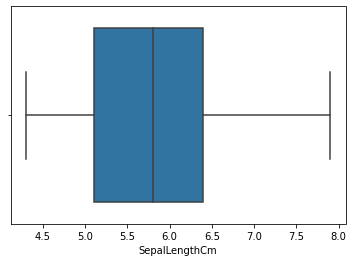

In [9]:
sns.boxplot(df['SepalLengthCm'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

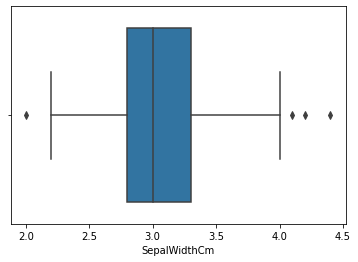

In [10]:
sns.boxplot(df['SepalWidthCm'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

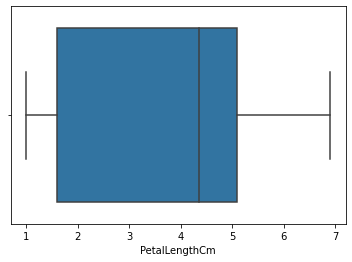

In [11]:
sns.boxplot(df['PetalLengthCm'])

E:\Newfolder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

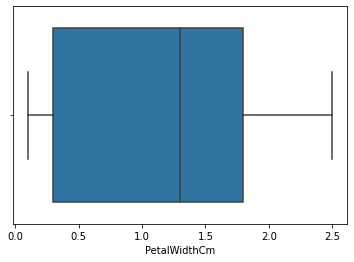

In [12]:
sns.boxplot(df['PetalWidthCm'])

In [13]:
q1=df.SepalWidthCm.quantile(0.25)
q3=df.SepalWidthCm.quantile(0.75)
iqr=q3-q1
df=df[~((df['SepalWidthCm']<(q1-1.5*iqr)) | (df['SepalWidthCm']>(q3+1.5*iqr)))]
df.shape

(146, 6)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

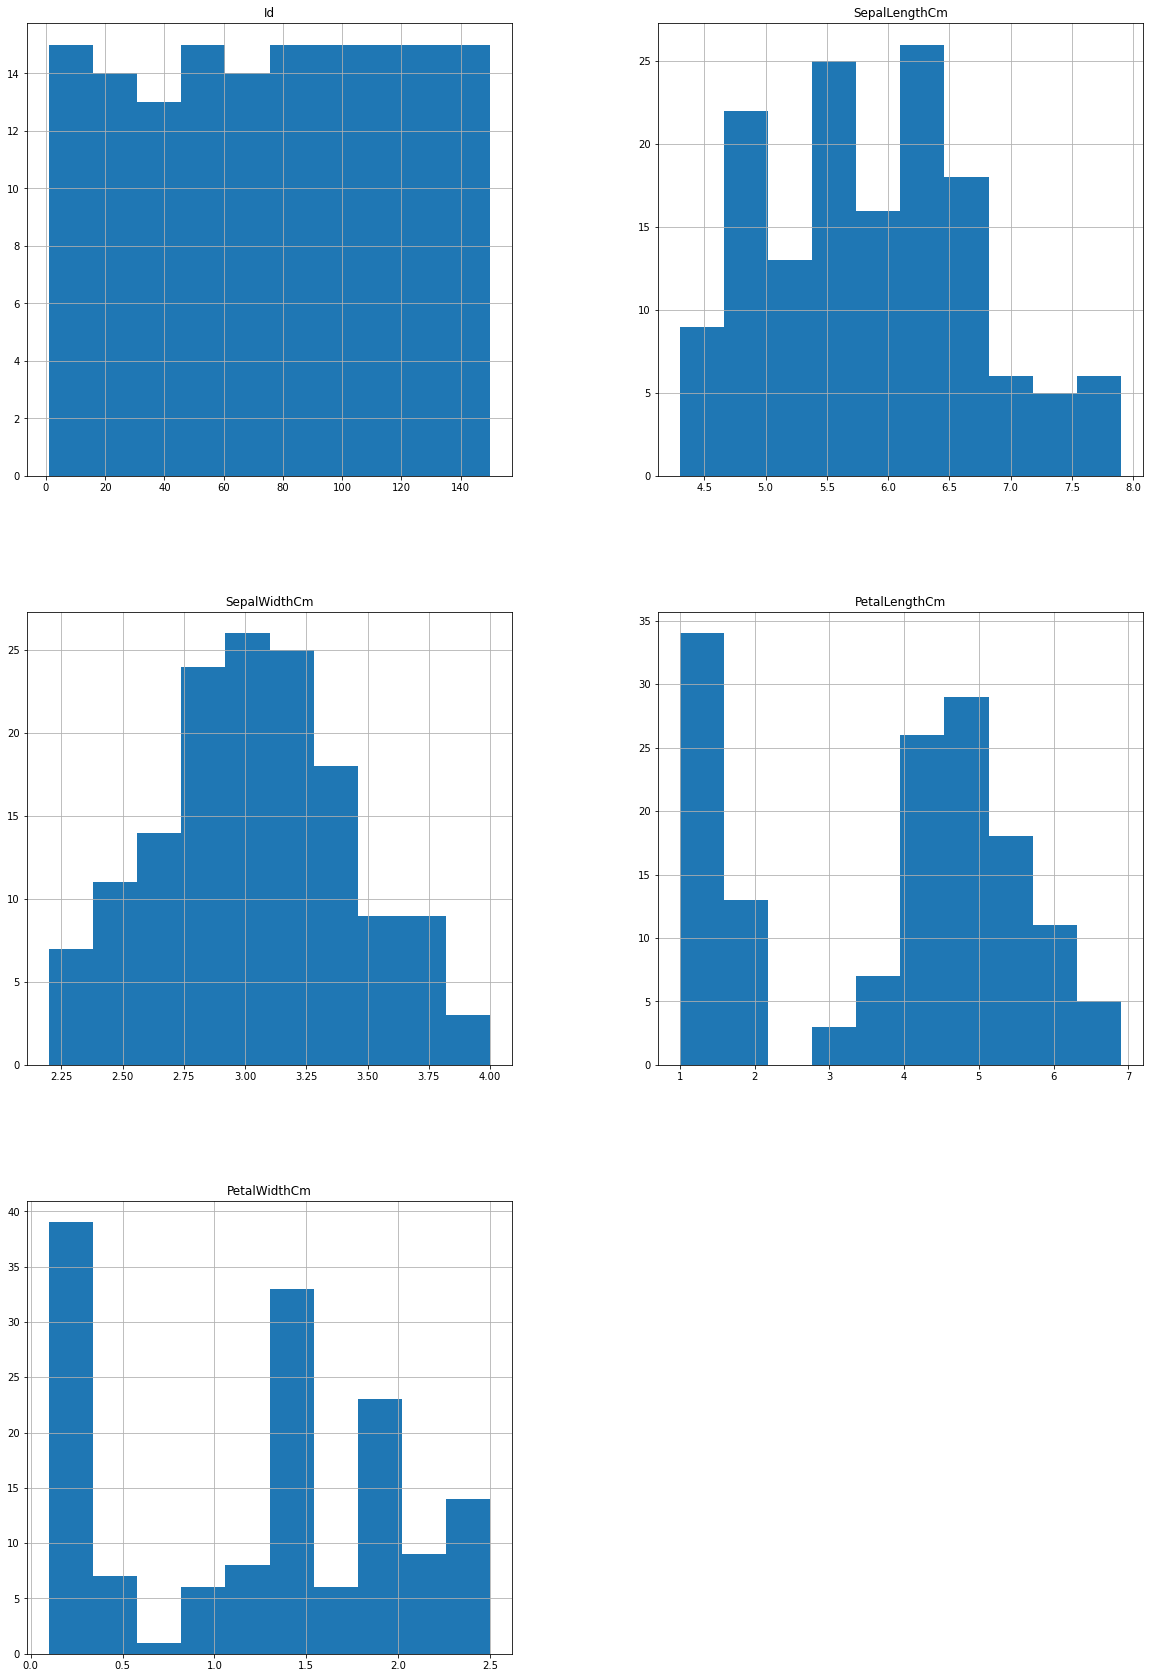

In [30]:
df.hist(figsize=(20,30))

In [35]:
from sklearn.model_selection import train_test_split
df.drop("Id",axis=1,inplace=True)
x=df.drop(['Species'],axis=1)
y=df['Species']

y.head()


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [36]:
y.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
new_y=y.map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})


In [38]:
new_y.head(200)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 146, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,new_y,test_size=0.33,random_state=42)


In [40]:
dt=DecisionTreeClassifier(max_leaf_nodes=10,random_state=33)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=33)

In [41]:
y_pre=dt.predict(X_test)


In [42]:
accuracy_score(y_test,y_pre)*100


95.91836734693877

In [43]:
matrix_confusion=confusion_matrix(y_test,y_pre)


<AxesSubplot:>

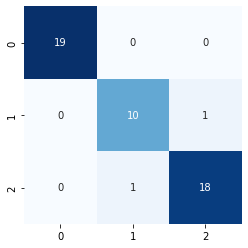

In [44]:
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


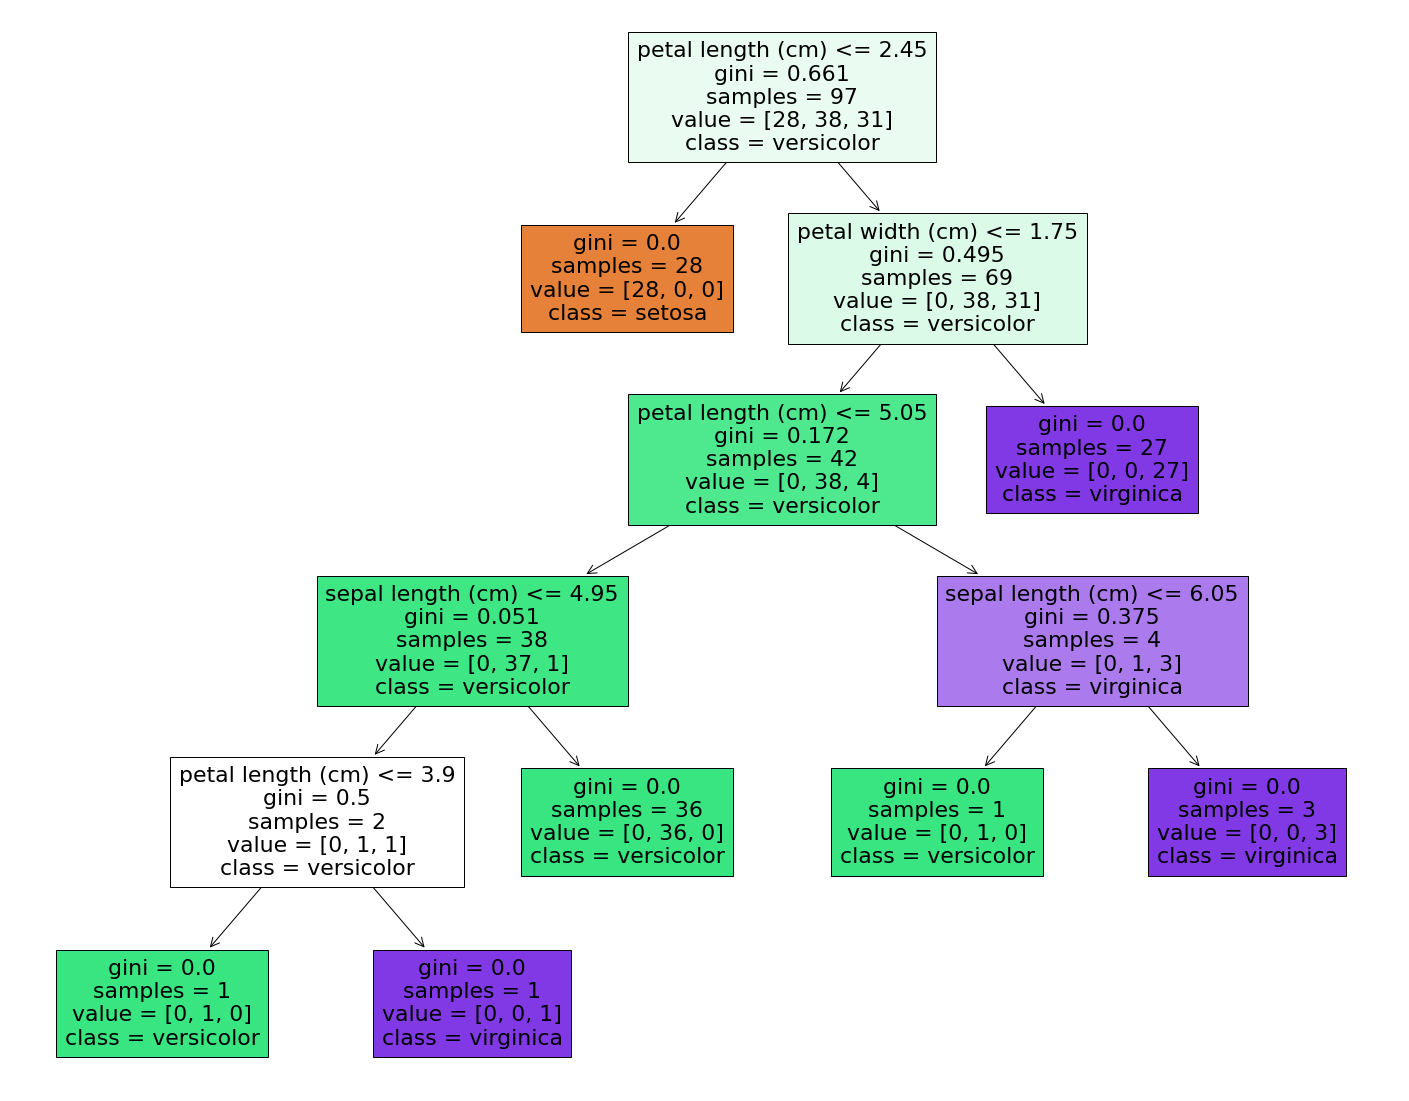

In [45]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [46]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- class: 2



In [47]:
M={"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
test=dt.predict([[5.1,3.5,1.4,0.2]])

In [48]:
if test==0:
    print("Iris-setosa")
elif test==1:
    print("Iris-versicolor")
elif test==2:
    print("Iris-virginica")

Iris-setosa
